# **Lecture5 homework: wind turbulence statistics**

Name: Shuai Wu

Stuent ID: 24S054016

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [2]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

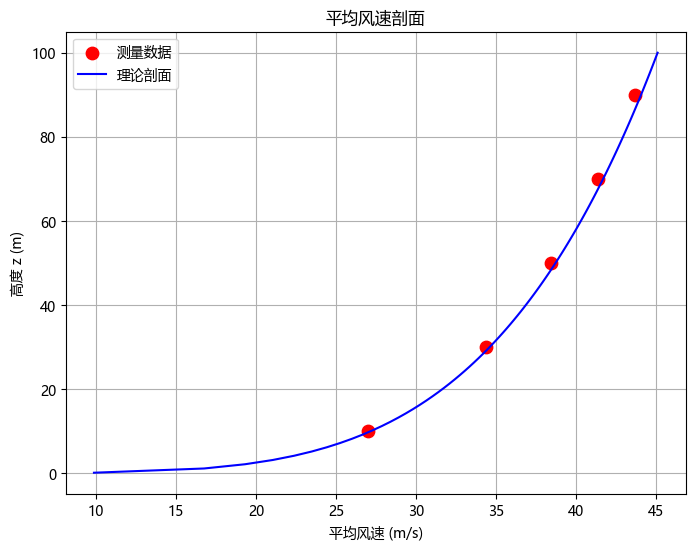

测量点高度和对应的平均风速：
高度 z = 10.0 m: 平均风速 = 26.97 m/s
高度 z = 30.0 m: 平均风速 = 34.33 m/s
高度 z = 50.0 m: 平均风速 = 38.40 m/s
高度 z = 70.0 m: 平均风速 = 41.34 m/s
高度 z = 90.0 m: 平均风速 = 43.67 m/s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'Arial Unicode MS']  # 尝试多个字体
plt.rcParams['axes.unicode_minus'] = False  # 使用ASCII的连字符代替Unicode减号

# 计算每个测点的平均风速 (U分量)
U_avg = np.mean(U, axis=1)
Z_points = Z

# 理论风速剖面
z_theo = np.linspace(0.1, 100, 100)  # 从0.1开始而不是0,不然计算时会出现除0的错误
U_r = 50  # m/s
z_r = 160  # m
alpha = 0.22
U_theo = U_r * (z_theo/z_r)**alpha

# 绘制平均风速剖面
plt.figure(figsize=(8, 6))
plt.scatter(U_avg, Z_points, marker='o', color='red', s=80, label='测量数据')
plt.plot(U_theo, z_theo, 'b-', label='理论剖面')
plt.xlabel('平均风速 (m/s)')
plt.ylabel('高度 z (m)')
plt.title('平均风速剖面')
plt.grid(True)
plt.legend()
plt.show()

print("测量点高度和对应的平均风速：")
for i in range(len(Z_points)):
    print(f"高度 z = {Z_points[i]} m: 平均风速 = {U_avg[i]:.2f} m/s")


#### 1.2 Turbulence intensity profile

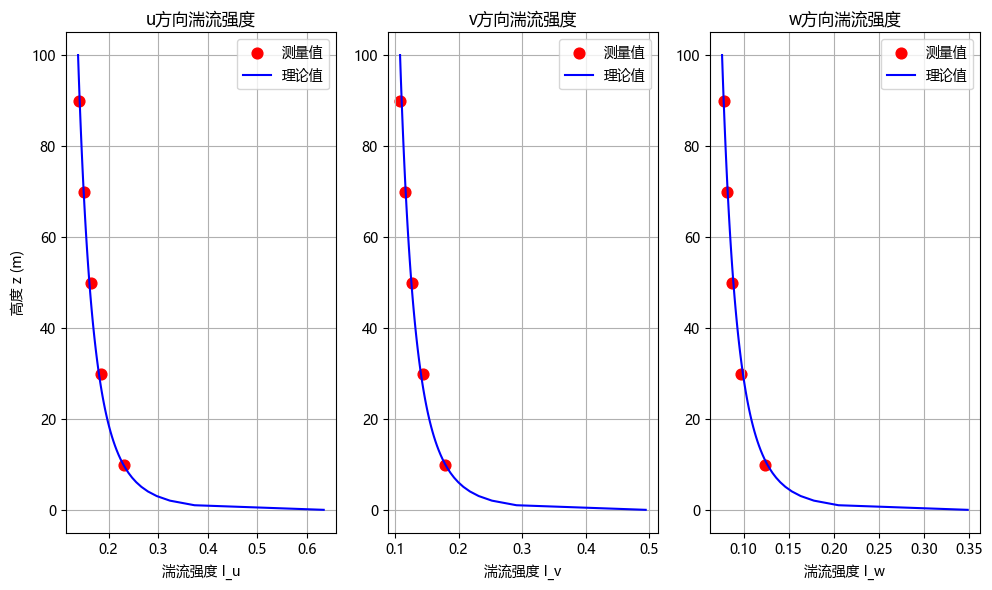

测量点湍流强度：
高度 z = 10.0 m: I_u = 0.2313, I_v = 0.1782, I_w = 0.1242
高度 z = 30.0 m: I_u = 0.1855, I_v = 0.1438, I_w = 0.0973
高度 z = 50.0 m: I_u = 0.1649, I_v = 0.1267, I_w = 0.0870
高度 z = 70.0 m: I_u = 0.1500, I_v = 0.1162, I_w = 0.0821
高度 z = 90.0 m: I_u = 0.1405, I_v = 0.1082, I_w = 0.0788


In [4]:
# 计算脉动风速
u = U - np.mean(U, axis=1)[:, np.newaxis]  # u方向脉动风速
v = V - np.mean(V, axis=1)[:, np.newaxis]  # v方向脉动风速
w = W - np.mean(W, axis=1)[:, np.newaxis]  # w方向脉动风速

# 计算湍流强度
I_u = np.std(u, axis=1) / U_avg
I_v = np.std(v, axis=1) / U_avg
I_w = np.std(w, axis=1) / U_avg

# 理论湍流强度曲线
I_10 = 0.23
I_u_theo = I_10 * (z_theo/10)**(-alpha)
I_v_theo = 0.78 * I_u_theo
I_w_theo = 0.55 * I_u_theo

# 绘制湍流强度剖面
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.scatter(I_u, Z_points, marker='o', color='red', s=60, label='测量值')
plt.plot(I_u_theo, z_theo, 'b-', label='理论值')
plt.xlabel('湍流强度 I_u')
plt.ylabel('高度 z (m)')
plt.title('u方向湍流强度')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(I_v, Z_points, marker='o', color='red', s=60, label='测量值')
plt.plot(I_v_theo, z_theo, 'b-', label='理论值')
plt.xlabel('湍流强度 I_v')
plt.title('v方向湍流强度')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(I_w, Z_points, marker='o', color='red', s=60, label='测量值')
plt.plot(I_w_theo, z_theo, 'b-', label='理论值')
plt.xlabel('湍流强度 I_w')
plt.title('w方向湍流强度')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("测量点湍流强度：")
for i in range(len(Z_points)):
    print(f"高度 z = {Z_points[i]} m: I_u = {I_u[i]:.4f}, I_v = {I_v[i]:.4f}, I_w = {I_w[i]:.4f}")


#### 1.3 Wind power spectral density

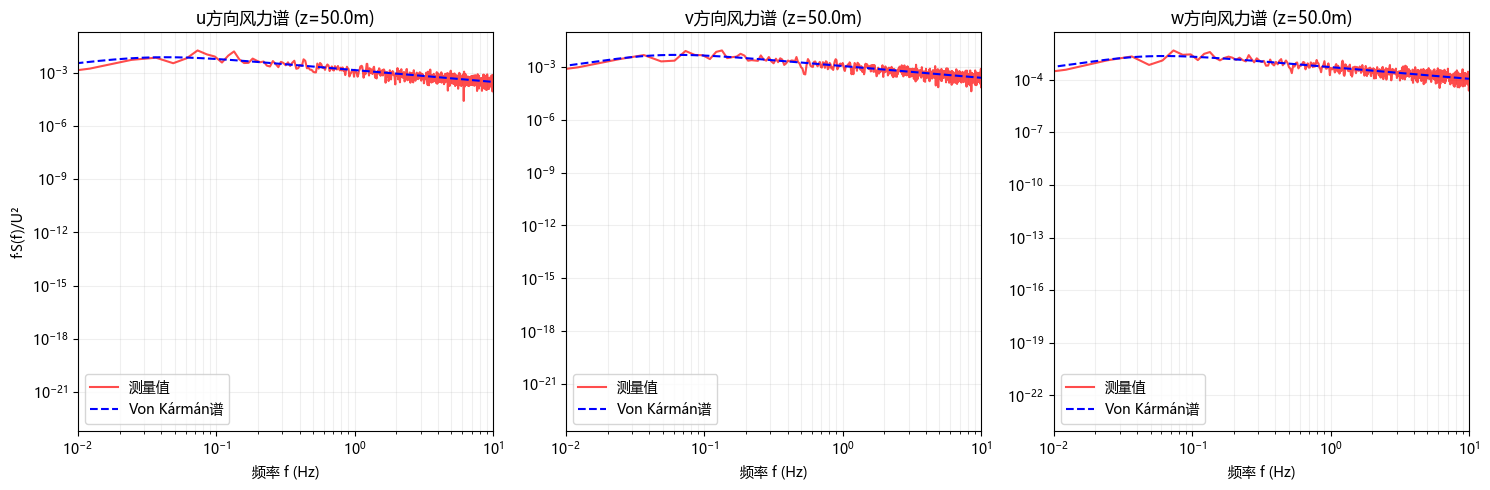

选择的高度点: z = 50.0 m
平均风速: 38.40 m/s
湍流强度: I_u = 0.1649, I_v = 0.1267, I_w = 0.0870
积分尺度: L_u_x = 129.10 m, L_v_x = 64.55 m, L_w_x = 64.55 m


In [5]:

from scipy import signal

# 选择一个特定高度点进行分析 (选择z=50m的点，即索引2)
point_idx = 2  # 第3个测点 (z = 50m)
z_selected = Z[point_idx]

# 计算该点的平均风速和湍流强度
U_avg_selected = U_avg[point_idx]
I_u_selected = I_u[point_idx]
I_v_selected = I_v[point_idx]
I_w_selected = I_w[point_idx]

# 计算积分尺度
L_u_x = 100 * (z_selected/30)**0.5
L_v_x = 0.5 * L_u_x
L_w_x = 0.5 * L_u_x

# 计算功率谱
fs = 1/dt  # 采样频率
u_selected = u[point_idx, :]
v_selected = v[point_idx, :]
w_selected = w[point_idx, :]

# 使用Welch方法计算PSD
f_u, Pxx_u = signal.welch(u_selected, fs, nperseg=8192, noverlap=4096, scaling='density')
f_v, Pxx_v = signal.welch(v_selected, fs, nperseg=8192, noverlap=4096, scaling='density')
f_w, Pxx_w = signal.welch(w_selected, fs, nperseg=8192, noverlap=4096, scaling='density')

# 计算理论Von Kármán谱
f_theo = np.logspace(-3, 1, 1000)
S_u_theo = 4*(I_u_selected*U_avg_selected)**2*(L_u_x/U_avg_selected)/(1+70.8*(f_theo*L_u_x/U_avg_selected)**2)**(5/6)
S_v_theo = 4*(I_v_selected*U_avg_selected)**2*(L_v_x/U_avg_selected)*(1+188.4*(2*f_theo*L_v_x/U_avg_selected)**2)/(1+70.8*(2*f_theo*L_v_x/U_avg_selected)**2)**(11/6)
S_w_theo = 4*(I_w_selected*U_avg_selected)**2*(L_w_x/U_avg_selected)*(1+188.4*(2*f_theo*L_w_x/U_avg_selected)**2)/(1+70.8*(2*f_theo*L_w_x/U_avg_selected)**2)**(11/6)

# 绘制频谱图 (使用对数坐标)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.loglog(f_u, f_u*Pxx_u/(U_avg_selected**2), 'r-', alpha=0.7, label='测量值')
plt.loglog(f_theo, f_theo*S_u_theo/(U_avg_selected**2), 'b--', label='Von Kármán谱')
plt.xlabel('频率 f (Hz)')
plt.ylabel('f·S(f)/U²')
plt.title(f'u方向风力谱 (z={z_selected}m)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim(0.01, 10)

plt.subplot(1, 3, 2)
plt.loglog(f_v, f_v*Pxx_v/(U_avg_selected**2), 'r-', alpha=0.7, label='测量值')
plt.loglog(f_theo, f_theo*S_v_theo/(U_avg_selected**2), 'b--', label='Von Kármán谱')
plt.xlabel('频率 f (Hz)')
plt.title(f'v方向风力谱 (z={z_selected}m)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim(0.01, 10)

plt.subplot(1, 3, 3)
plt.loglog(f_w, f_w*Pxx_w/(U_avg_selected**2), 'r-', alpha=0.7, label='测量值')
plt.loglog(f_theo, f_theo*S_w_theo/(U_avg_selected**2), 'b--', label='Von Kármán谱')
plt.xlabel('频率 f (Hz)')
plt.title(f'w方向风力谱 (z={z_selected}m)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim(0.01, 10)

plt.tight_layout()
plt.show()

print(f"选择的高度点: z = {z_selected} m")
print(f"平均风速: {U_avg_selected:.2f} m/s")
print(f"湍流强度: I_u = {I_u_selected:.4f}, I_v = {I_v_selected:.4f}, I_w = {I_w_selected:.4f}")
print(f"积分尺度: L_u_x = {L_u_x:.2f} m, L_v_x = {L_v_x:.2f} m, L_w_x = {L_w_x:.2f} m")

#### 1.4 Probability density curve

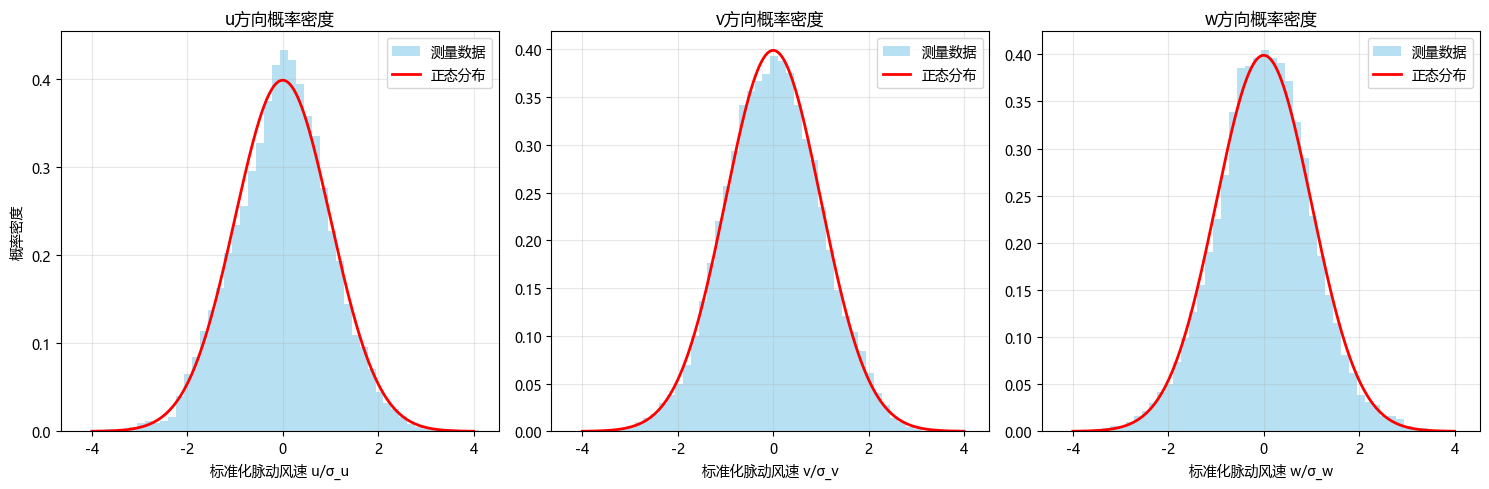

选择的高度点: z = 50.0 m

正态性检验 (Shapiro-Wilk检验):
u方向 p值: 0.000000 (不服从正态分布)
v方向 p值: 0.000000 (不服从正态分布)
w方向 p值: 0.000000 (不服从正态分布)

峰度和偏度:
u方向: 峰度 = 0.2974, 偏度 = -0.0702
v方向: 峰度 = -0.1259, 偏度 = -0.0018
w方向: 峰度 = 0.2855, 偏度 = -0.0339


In [6]:

import scipy.stats as stats

# 选择同一个点(z=50m)的数据
point_idx = 2  # 第3个测点 (z = 50m)

# 归一化脉动风速 (使均值为0，标准差为1)
u_norm = u[point_idx, :] / np.std(u[point_idx, :])
v_norm = v[point_idx, :] / np.std(v[point_idx, :])
w_norm = w[point_idx, :] / np.std(w[point_idx, :])

# 生成概率密度函数
bins = 50
plt.figure(figsize=(15, 5))

# u方向概率密度
plt.subplot(1, 3, 1)
counts, bins, _ = plt.hist(u_norm, bins=bins, density=True, alpha=0.6, color='skyblue', label='测量数据')
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='正态分布')
plt.xlabel('标准化脉动风速 u/σ_u')
plt.ylabel('概率密度')
plt.title('u方向概率密度')
plt.grid(True, alpha=0.3)
plt.legend()

# v方向概率密度
plt.subplot(1, 3, 2)
counts, bins, _ = plt.hist(v_norm, bins=bins, density=True, alpha=0.6, color='skyblue', label='测量数据')
plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='正态分布')
plt.xlabel('标准化脉动风速 v/σ_v')
plt.title('v方向概率密度')
plt.grid(True, alpha=0.3)
plt.legend()

# w方向概率密度
plt.subplot(1, 3, 3)
counts, bins, _ = plt.hist(w_norm, bins=bins, density=True, alpha=0.6, color='skyblue', label='测量数据')
plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='正态分布')
plt.xlabel('标准化脉动风速 w/σ_w')
plt.title('w方向概率密度')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 计算统计检验值
print(f"选择的高度点: z = {Z[point_idx]} m")
print("\n正态性检验 (Shapiro-Wilk检验):")
_, p_u = stats.shapiro(u_norm[:5000])  # 由于样本量大，只取部分数据进行检验
_, p_v = stats.shapiro(v_norm[:5000])
_, p_w = stats.shapiro(w_norm[:5000])
print(f"u方向 p值: {p_u:.6f} ({'服从正态分布' if p_u > 0.05 else '不服从正态分布'})")
print(f"v方向 p值: {p_v:.6f} ({'服从正态分布' if p_v > 0.05 else '不服从正态分布'})")
print(f"w方向 p值: {p_w:.6f} ({'服从正态分布' if p_w > 0.05 else '不服从正态分布'})")

# 计算峰度和偏度
print("\n峰度和偏度:")
print(f"u方向: 峰度 = {stats.kurtosis(u_norm):.4f}, 偏度 = {stats.skew(u_norm):.4f}")
print(f"v方向: 峰度 = {stats.kurtosis(v_norm):.4f}, 偏度 = {stats.skew(v_norm):.4f}")
print(f"w方向: 峰度 = {stats.kurtosis(w_norm):.4f}, 偏度 = {stats.skew(w_norm):.4f}")

### 2 Statistical results of the y-direction wind velocity time history

In [7]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

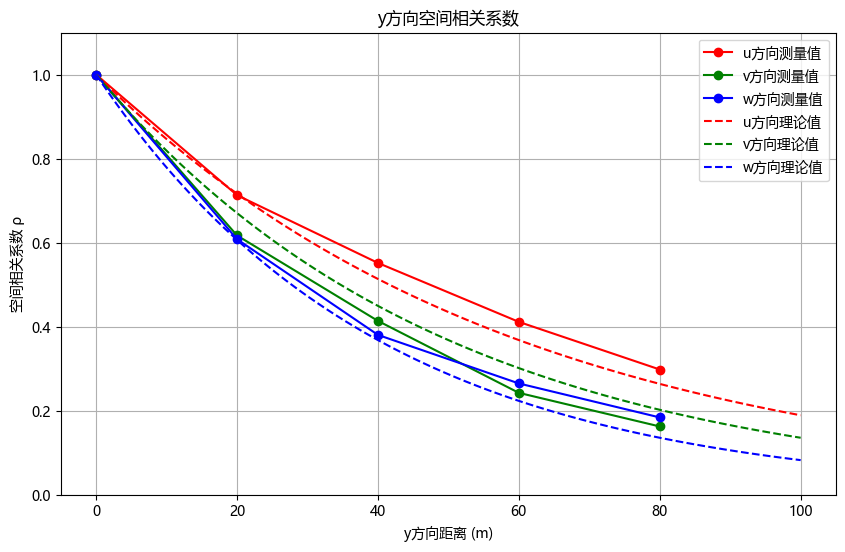

y方向空间相关系数结果：
距离 (m)   ρ_u     ρ_v     ρ_w
  0.0    1.0000  1.0000  1.0000
 20.0    0.7129  0.6170  0.6081
 40.0    0.5516  0.4135  0.3802
 60.0    0.4112  0.2423  0.2646
 80.0    0.2978  0.1622  0.1837

拟合积分尺度:
L_u_y (实测) = 65.91 m (理论值: 60 m)
L_v_y (实测) = 43.39 m (理论值: 50 m)
L_w_y (实测) = 43.31 m (理论值: 40 m)


In [8]:
# 数据准备 - 加载Y方向数据
# 计算脉动风速
u_y = U - np.mean(U, axis=1)[:, np.newaxis]  # u方向脉动风速
v_y = V - np.mean(V, axis=1)[:, np.newaxis]  # v方向脉动风速
w_y = W - np.mean(W, axis=1)[:, np.newaxis]  # w方向脉动风速

# 空间距离
y_distances = Y - Y[0]  # 相对于第一个点的距离

# 计算空间相关系数
ref_point = 0  # 参考点 (第一个点)

# 计算每个方向的空间相关系数
rho_u = np.zeros(len(Y))
rho_v = np.zeros(len(Y))
rho_w = np.zeros(len(Y))

for i in range(len(Y)):
    # 计算相关系数
    corr_matrix_u = np.corrcoef(u_y[ref_point, :], u_y[i, :])
    corr_matrix_v = np.corrcoef(v_y[ref_point, :], v_y[i, :])
    corr_matrix_w = np.corrcoef(w_y[ref_point, :], w_y[i, :])
    
    rho_u[i] = corr_matrix_u[0, 1]
    rho_v[i] = corr_matrix_v[0, 1]
    rho_w[i] = corr_matrix_w[0, 1]

# 理论相关系数曲线
y_theo = np.linspace(0, 100, 100)
L_u_y = 60  # m
L_v_y = 50  # m
L_w_y = 40  # m

rho_u_theo = np.exp(-np.abs(y_theo) / L_u_y)
rho_v_theo = np.exp(-np.abs(y_theo) / L_v_y)
rho_w_theo = np.exp(-np.abs(y_theo) / L_w_y)

# 绘制空间相关系数
plt.figure(figsize=(10, 6))

plt.plot(y_distances, rho_u, 'ro-', label='u方向测量值')
plt.plot(y_distances, rho_v, 'go-', label='v方向测量值')
plt.plot(y_distances, rho_w, 'bo-', label='w方向测量值')

plt.plot(y_theo, rho_u_theo, 'r--', label='u方向理论值')
plt.plot(y_theo, rho_v_theo, 'g--', label='v方向理论值')
plt.plot(y_theo, rho_w_theo, 'b--', label='w方向理论值')

plt.xlabel('y方向距离 (m)')
plt.ylabel('空间相关系数 ρ')
plt.title('y方向空间相关系数')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 显示相关系数结果
print("y方向空间相关系数结果：")
print("距离 (m)   ρ_u     ρ_v     ρ_w")
for i in range(len(Y)):
    print(f"{y_distances[i]:5.1f}    {rho_u[i]:.4f}  {rho_v[i]:.4f}  {rho_w[i]:.4f}")

# 估计实际积分尺度
from scipy.optimize import curve_fit

def exp_func(x, L):
    return np.exp(-np.abs(x) / L)

# 拟合积分尺度
popt_u, _ = curve_fit(exp_func, y_distances, rho_u)
popt_v, _ = curve_fit(exp_func, y_distances, rho_v)
popt_w, _ = curve_fit(exp_func, y_distances, rho_w)

print("\n拟合积分尺度:")
print(f"L_u_y (实测) = {popt_u[0]:.2f} m (理论值: {L_u_y} m)")
print(f"L_v_y (实测) = {popt_v[0]:.2f} m (理论值: {L_v_y} m)")
print(f"L_w_y (实测) = {popt_w[0]:.2f} m (理论值: {L_w_y} m)")
